In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime,timedelta
import matplotlib.pyplot as plt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect,text

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)


In [6]:
inspector = inspect(engine)


In [7]:
# View all of the classes that automap found
inspector.get_table_names()

['measurement', 'station']

In [8]:
# Save references to each table
measure = Base.classes.measurement
stat = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
session.query(measure.date).order_by(measure.date.desc()).first()

('2017-08-23',)

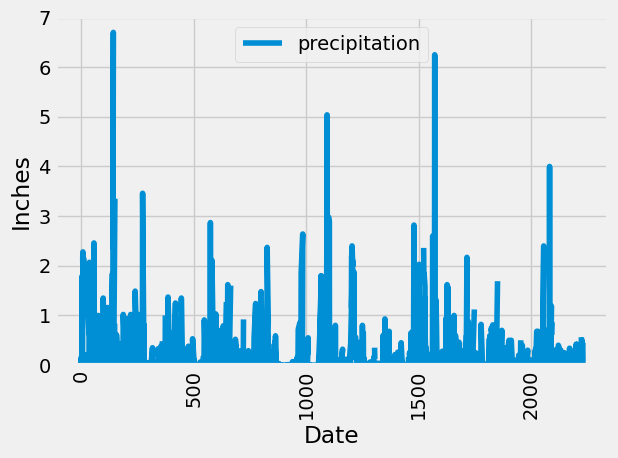

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
date_ref = datetime(2017,8,23)


# Calculate the date one year from the last date in data set.
year_ago = date_ref - timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
year_precip = session.query(measure.prcp,measure.date).filter(measure.date > '2016-08-22').order_by(measure.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
data_df = pd.DataFrame(year_precip,columns = ['precipitation','date'])

# Sort the dataframe by date
data_set_df = data_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
data_set_df.plot()
plt.ylim(0,7)
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.tight_layout()
plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
data_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(measure.station, func.count(measure.station)).all()

In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(measure.station,func.count(measure.station)).\
    order_by(func.count(measure.station).desc()).\
    group_by(measure.station).all() 
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
desc = session.query(func.min(measure.tobs),func.max(measure.tobs),func.avg(measure.tobs)).\
filter(measure.station =='USC00519281').all()
desc

[(54.0, 85.0, 71.66378066378067)]

In [16]:
#most recent date: 
recent_date = session.query(func.max(measure.date)).filter(measure.station =='USC00519281').all()
recent_date

[('2017-08-18',)]

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station 
start_date = '2016-08-18'
sel = [measure.date, 
       measure.tobs]
station_temps = session.query(*sel).\
        filter(func.strftime(measure.date) >= start_date, measure.station == 'USC00519281').\
        group_by(measure.date).\
        order_by(measure.date).all()

# Create a datafrem containing the results of this query
station_temps_df = pd.DataFrame(station_temps, columns=['Measurement Date', 'Temperature'])
station_temps_df.head()

# Create a histogram to visualize the temperature observations from Station USC00519281 


,Measurement Date,Temperature
0,2016-08-18,80.0
1,2016-08-19,79.0
2,2016-08-20,81.0
3,2016-08-21,79.0
4,2016-08-22,78.0


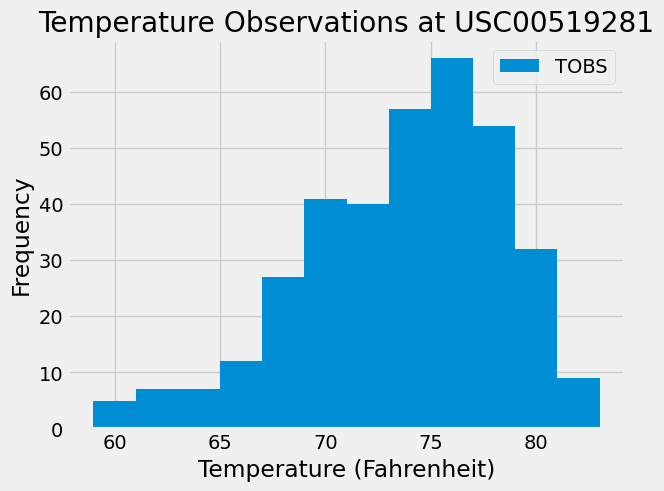

In [18]:
# plotting the results as a histogram
plt.hist(station_temps_df['Temperature'],bins=12, density=False, label="TOBS")
plt.xlabel("Temperature (Fahrenheit)")
plt.ylabel("Frequency")
plt.legend()
plt.title("Temperature Observations at USC00519281")
plt.figsize=(10,7)
plt.savefig('Annual_Temps_USC00519281.png',bbox_inches='tight')
plt.show()

# Close Session

In [19]:
# Close Session
session.close()